In [478]:
# Python Lab test Nov 24, 2023
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt

In [479]:
# Q0  Write your name and student ID on the following lines and run this cell
name = 'Callum O\'Brien'
sid = 'C21306503'
print('My name is ', name, ' and my ID is ', sid, '\n')

My name is  Callum O'Brien  and my ID is  C21306503 



In [480]:
# Q1
def convertVector(v):
    for i in range(len(v)):
        if v[i] == 1:
            return i
    
    return 

u = np.array([[0],[0],[1],[0],[0],[0],[0],[0],[0],[0]])
convertVector(u)

2

In [481]:
# Q2
# Rescue cat decider function. 
# rescueCat([have a dog, have cat allergy, is a kitten])
def rescueCat(input):
    weights = np.array([4, -1, 6])  
    threshold = 3
    # complete code, don't change the threshold value
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0


In [482]:
# try it out on the 3 vector inputs described
print(rescueCat([1, 1, 0]))
print(rescueCat([1, 0, 0]))
print(rescueCat([0, 0, 1]))

0
1
1


In [483]:
# This class is complete and works correctly. You need it for Q3
# Do not modify it.

class Perceptron(object):
    def __init__(self, n):
        self.n = n
        np.random.seed(2019)
        self.w = np.random.randn(n,)  
        self.b = np.random.randn() 
    
    def feedforward(self, xs):
        res = [self.w.dot(x) + self.b for x in xs]
        return np.array([step(r) for r in res])
   
    def train(self, xs, ys, epochs, eta):
        cost = np.zeros((epochs,), dtype=float)
        
        for ep in range(epochs):                
            del_w = np.zeros((self.n,), dtype=float)
            del_b = 0.0
            
            for x,y in zip(xs, ys):  
                z = self.w.dot(x) + self.b
                a = step(z)
                e = y - a   
                
                cost[ep] += 0.5 * e**2
                
                del_w += eta * e * x  
                del_b += eta * e      
                                                                           
            self.w += del_w
            self.b += del_b
            
        return cost
            
def step(weighted_sum):
    if weighted_sum <= 0:
        return 0
    else:
        return 1

def sigm(z):
    return 1.0 / (1.0 + np.exp(-z))

[1 1 1 1]
[0 0 0 1]


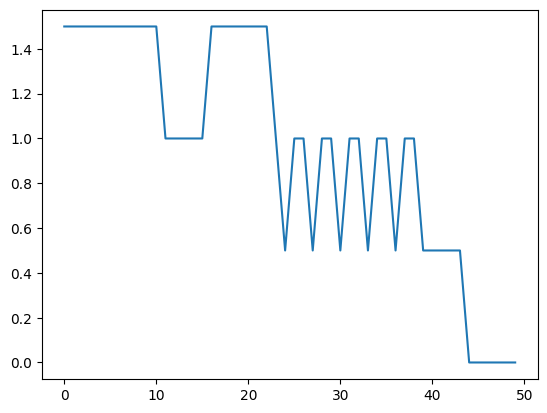

In [484]:
# Q3 code for creating Perceptron and training it. 
# You will need the input vectors and the corresponding desired outputs.
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

targets = np.array([0, 0, 0, 1])

c21306503 = Perceptron(2)
print(c21306503.feedforward(inputs))

epochs = 50
eta = 0.03

cst = c21306503.train(inputs, targets, epochs, eta)

print(c21306503.feedforward(inputs))

eps = [e for e in range(epochs)]
plt.plot(eps, cst)


In [485]:
# Q4
# SigmoidPerceptron code

class SigmoidPerceptron(object):
    def __init__(self, n):
        self.n = n
        np.random.seed(2019)
        self.w = np.random.randn(n,)  
        self.b = np.random.randn() 
    
    def feedforward(self, xs):
        # res = [self.w.dot(x) + self.b for x in xs]
        # return np.array([step(r) for r in res])

        res = [sigm(self.w.dot(x) + self.b) for x in xs]
        return np.array(res)
   
    def train(self, xs, ys, epochs, eta):
        cost = np.zeros((epochs,), dtype=float)
        
        for ep in range(epochs):                
            del_w = np.zeros((self.n,), dtype=float)
            del_b = 0.0
            
            for x,y in zip(xs, ys):  
                z = self.w.dot(x) + self.b
                a = sigm(z) # changed from step(z) to sigm(z)
                e = y - a    
                
                cost[ep] += 0.5 * e**2
                
                del_w += eta * e * x  
                del_b += eta * e      
                                                                           
            self.w += del_w
            self.b += del_b
            
        return cost
            
def step(weighted_sum):
    if weighted_sum <= 0:
        return 0
    else:
        return 1

def sigm(z):
    return 1.0 / (1.0 + np.exp(-z))




[0.81476551 0.90910315 0.77964501 0.88944202]
[0.00119143 0.08545696 0.08541045 0.87974234]


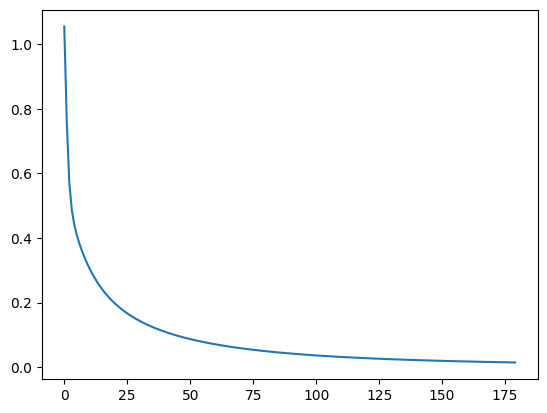

In [486]:
# Q4

catSP = SigmoidPerceptron(2)
print(catSP.feedforward(inputs))

epochs = 180
eta = 0.3

cst = catSP.train(inputs, targets, epochs, eta)

print(catSP.feedforward(inputs))

eps = [e for e in range(epochs)]
plt.plot(eps, cst)


In [487]:
# Q5 Complete the code below

# define a 3 layer network: 
# 4 neurons in input layer, 3 hidden neurons in middle layer, 
# and 2 neurons in output layer. Hidden layer requires 3 by 4 matrix or array 
# Need one bias for each neuron in middle and output layers.
# Fill weights and biases with random numbers.
# No training


class FakeNN(object):
    def __init__(self):
        np.random.seed(2021)
        self.w2 = np.random.randn(3,4)   # weights for layer 2, hidden layer
        self.b2 = np.random.randn(3, 1)    # bias of hidden layer
        self.w3 = np.random.randn(3, 3)    # weights for layer 3, output layer
        self.b3 = np.random.randn(3, 1)    # bias of output layer
    
    # following operation is to feed an input column vector through
    # each network layer, with sigmoid activation function for
    # each neuron
    def feedforward(self, x):  # assumes x is a (4,1) shaped input column vector
        # complete the code
        z2 = np.dot(self.w2, x) + self.b2
        a2 = sigm(z2)
        
        z3 = np.dot(self.w3, a2) + self.b3
        a3 = sigm(z3)
        
        return a3
    
    def getCost(self, xs, ys):
        cost = 0.0

        # x = xs.reshape(3, 1)
        # y = ys.reshape(2, 1)

        # Forward pass
        a_hidden = self.feedforward(xs)

        if a_hidden.shape != ys.shape:
            ys = np.resize(ys, a_hidden.shape)

        # Calculate cost using Mean Squared Error (MSE)
        cost += np.sum((a_hidden - ys) ** 2)

        return cost

def sigm(z):
    return 1.0 / (1.0 + np.exp(-z))


In [488]:
input = np.array([1,1,0,1]).reshape(4,1)
fake = FakeNN()

print(fake.feedforward(input))      

[[0.43946468]
 [0.2935905 ]
 [0.98490126]]


In [489]:
target = np.array([[0], [1]])
# Given this target output for the input in previous cell, calculate the mean squared error
# cost after feeding input through fake
cost = fake.getCost(input, target)
print(cost)


1.6621740656351314
